# Classification de textes

## Questions
> ### Identification du thème du document
> 1. Télécharger les données [Reuters-21578](https://huggingface.co/datasets/reuters21578)
> 1. Extraire les textes (body) ainsi que les catégories (topics) qui leur sont associées. Garder les textes étiquetés avec les 4 catégories les plus fréquentes. 
> 1. Les tokeniser en utilisant [`spacy`](https://spacy.io/usage/spacy-101#annotations-token)
> 1. (\*) Représenter chaque texte par un vecteur *sac-de-mots* de comptes. (SANS utiliser CountVectorizer de sklearn)
> 1. (\*) En utilisant la représentation précédente entraîner un [classifieur bayésien naïf](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes). Observer les paramétres du modèle. Rapporter les performance du modèle en termes de Précision/Rappel/Score_F1. Commentez.

> ### Classification de sentiments
> 1. (\*) Télécharger les données *sacs-de-mots* (version ACL) d'[avis](https://www.cs.jhu.edu/~mdredze/datasets/sentiment/) sur des produits d'amazon. Observer les tokens choisis. Que constatez vous?
> 1. Entraîner un classifieur de sentiments pour ce jeu de données d'avis. Rapporter les performance du modèle en termes de Précision/Rappel/Score_F1.

> ### (\*) Similarités entre mots
> Hypothèse à tester: La fréquence de co-occurrence des mots dans des documents est un bon indicateur de leur "distance sémantique".
> 1. Soit $D$ la matrice binaire documents x mots. Soit $W = D^T D$. Quelles sont les dimensions de la matrice $W$? Comment interpréter la valeur de $W_{ij}$ (l'élément à la ième ligne et jème colonne)?
> 1. Comment pourriez vous utilise cette matrice pour tester l'hypothèse?
> 1. Tester sur les données reuters.

In [2]:
#pip install datasets # Les datasets réunis par Hugging Face

# Partie 1 : 

# Question 1 : 

In [3]:
from datasets import load_dataset
data = load_dataset("reuters21578", 'ModLewis', split='train')

In [4]:
data

Dataset({
    features: ['text', 'text_type', 'topics', 'lewis_split', 'cgis_split', 'old_id', 'new_id', 'places', 'people', 'orgs', 'exchanges', 'date', 'title'],
    num_rows: 13625
})

In [5]:
data[0]

{'text': 'Showers continued throughout the week in\nthe Bahia cocoa zone, alleviating the drought since early\nJanuary and improving prospects for the coming temporao,\nalthough normal humidity levels have not been restored,\nComissaria Smith said in its weekly review.\n    The dry period means the temporao will be late this year.\n    Arrivals for the week ended February 22 were 155,221 bags\nof 60 kilos making a cumulative total for the season of 5.93\nmln against 5.81 at the same stage last year. Again it seems\nthat cocoa delivered earlier on consignment was included in the\narrivals figures.\n    Comissaria Smith said there is still some doubt as to how\nmuch old crop cocoa is still available as harvesting has\npractically come to an end. With total Bahia crop estimates\naround 6.4 mln bags and sales standing at almost 6.2 mln there\nare a few hundred thousand bags still in the hands of farmers,\nmiddlemen, exporters and processors.\n    There are doubts as to how much of this coc

# Question 2 :

In [6]:
import pandas as pd 

In [7]:
df = pd.DataFrame(data)

In [8]:
df = df.drop(['title' , 'cgis_split','text_type','lewis_split','old_id','new_id','places' , 'people' , 'orgs' , 'exchanges', 'date'],axis = 1 )

In [9]:
df = df[df['topics'].map(lambda d: len(d)) > 0]

In [10]:
df = df.explode('topics')

In [11]:
df 

,text,topics
0,Showers continued throughout the week in\nthe ...,cocoa
4,The U.S. Agriculture Department\nreported the ...,grain
4,The U.S. Agriculture Department\nreported the ...,wheat
4,The U.S. Agriculture Department\nreported the ...,corn
4,The U.S. Agriculture Department\nreported the ...,barley
...,...,...
13615,The Bank of Japan bought a small amount of\ndo...,money-fx
13616,"Japan's rubber stocks fell to 44,980\ntonnes i...",rubber
13617,THE BANK OF KOREA SAID IT FIXED THE\nMIDRATE O...,money-fx
13618,Nippon Mining Co Ltd said it lowered its\nsell...,copper


In [12]:
most_present = df["topics"].value_counts()[0:4]
most_present

earn        2877
acq         1650
money-fx     539
grain        434
Name: topics, dtype: int64

In [13]:
df_f = df[df["topics"].isin(['earn' , 'acq' , 'money-fx' , 'grain'])]
df_f

,text,topics
4,The U.S. Agriculture Department\nreported the ...,grain
5,Argentine grain board figures show\ncrop regis...,grain
8,Champion Products Inc said its\nboard of direc...,earn
9,Computer Terminal Systems Inc said\nit has com...,acq
10,"Shr 34 cts vs 1.19 dlrs\n Net 807,000 vs 2,...",earn
...,...,...
13608,News of an agreement among G-5 and G-7\nfinanc...,money-fx
13611,Bundesbank President Karl Otto Poehl\nsaid a w...,money-fx
13614,,money-fx
13615,The Bank of Japan bought a small amount of\ndo...,money-fx


# Question 3/4 : 

In [14]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [15]:
tokens =  df_f['text'].apply(lambda x : nlp(x))

In [16]:
tokens

4        (The, U.S., Agriculture, Department, \n, repor...
5        (Argentine, grain, board, figures, show, \n, c...
8        (Champion, Products, Inc, said, its, \n, board...
9        (Computer, Terminal, Systems, Inc, said, \n, i...
10       (Shr, 34, cts, vs, 1.19, dlrs, \n    , Net, 80...
                               ...                        
13608    (News, of, an, agreement, among, G-5, and, G-7...
13611    (Bundesbank, President, Karl, Otto, Poehl, \n,...
13614                                                   ()
13615    (The, Bank, of, Japan, bought, a, small, amoun...
13617    (THE, BANK, OF, KOREA, SAID, IT, FIXED, THE, \...
Name: text, Length: 5500, dtype: object

In [17]:
words = []
for elem in tokens : 
    
    for token in elem : 
        if token.text not in words :
            words.append(token.text)


In [18]:
import numpy as np 

In [19]:
from scipy.sparse import lil_matrix
sparse_matrix = lil_matrix((len(df_f), len(words)), dtype=np.float32)

In [20]:
for row_idx, text in enumerate(df_f['text']):
    ws = text.lower().split()
    for w in ws:
        if w in words:
            col_idx = words.index(w)
            sparse_matrix[row_idx, col_idx] += 1

In [21]:
sparse_matrix.data

array([list([1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 7.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 5.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 5.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]),
       list([1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 4.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 13.0, 1.0, 1.0, 8.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 4.0, 2.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0]),
       list([3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 4.0, 1.0, 3.0, 1.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0]),
       ..., list([]),
       list([7.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 4.0, 4.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0,

In [22]:
sparse_df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=words)

In [23]:
sparse_df

,The,U.S.,Agriculture,Department,\n,reported,the,farmer,-,owned,...,843.90,SET,845.50,YESTERDAY,HAS,RISEN,SO,FAR,THIS,RISING
0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5496,0.0,0.0,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5498,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
X = sparse_matrix
mapping = {"grain" : 3, 'money-fx' : 2 , 'acq' :1 , 'earn' : 0 }
y= df_f['topics'].map(mapping).to_numpy()




# Question 5 : 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [26]:
clf.score(X_test, y_test)

0.9045454545454545

In [27]:
from sklearn.metrics import precision_recall_fscore_support

In [28]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, clf.predict(X_test))

In [29]:
precision  , recall , f1_score 

(array([0.91080617, 0.85549133, 0.96341463, 1.        ]),
 array([0.91237113, 0.90519878, 0.85869565, 0.8989899 ]),
 array([0.91158798, 0.87964339, 0.90804598, 0.94680851]))

**the provided precision, recall, and F1-score metrics suggest that the model generally performs well across all four classes. However, it's important to consider the specific requirements and goals of your classification task to determine if these performance metrics are satisfactory for your application. Additionally, it's crucial to analyze other aspects of model performance, such as confusion matrices and ROC curves, to get a comprehensive understanding of its behavior.**

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_mat = confusion_matrix(y_test, clf.predict(X_test))

In [32]:
confusion_mat

array([[531,  48,   3,   0],
       [ 31, 296,   0,   0],
       [ 11,   2,  79,   0],
       [ 10,   0,   0,  89]])

<AxesSubplot:>

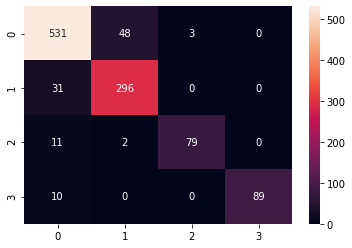

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_mat, annot=True, fmt="d") 

**As we can see, nothing to be worry about , the model is doing fairly good for the classification of all the classes.**

# Partie 3 : 


# Question 1 : 

- Matrix W is a square matrix because it results from the multiplication of DT (term-document matrix) by D (document-term matrix).
- If you have N documents and M unique words in your corpus, then the dimension of W will be M x M (because DT is M x N, and D is N x M).
- Interpreted as the word at the i and j index , exist at least once in the same document.

# Question 2 : 

Let's start by actually calculating the W matrice. 

In [76]:
sparse_matrix = lil_matrix((len(df_f), len(words)), dtype=np.float32)
for row_idx, text in enumerate(df_f['text']):
    ws = text.lower().split()
    for w in ws:
        if w in words:
            col_idx = words.index(w)
            sparse_matrix[row_idx, col_idx] = 1
            
sparse_df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=words)
sparse_df

,The,U.S.,Agriculture,Department,\n,reported,the,farmer,-,owned,...,843.90,SET,845.50,YESTERDAY,HAS,RISEN,SO,FAR,THIS,RISING
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5496,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5498,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
D = sparse_df.to_numpy()

In [78]:
W = D.T@D

In [82]:
W.shape

(31743, 31743)

**As we can see, the shape is really of the MxM**

## How can  we use this matrice to teste the hypothesis

**co-occurrence matrices are often constructed from text data to capture the associations between words or terms. Each row and column in the matrix represents a word or term from the vocabulary, and the matrix cells contain binary values indicating whether two words co-occur in a specific context.**

**We can test that by calculating the jaccard similarity between 2 random words for example**

# Question 3 : 


In [79]:
word1_index = 9

word2_index = 7

# Get the rows corresponding to the two words
word1_vector = W[word1_index].astype(bool)
word2_vector = W[word2_index].astype(bool)

# Calculate Jaccard similarity
intersection = np.sum(word1_vector & word2_vector) #nb of documents they appeared in both 
union = np.sum(word1_vector | word2_vector) # sum of documents where they appeared
jaccard_similarity = intersection / union
print(f"Jaccard Similarity between word {word1_index} and word {word2_index}: {jaccard_similarity}")

Jaccard Similarity between word 9 and word 7: 0.13778228875919818


In [80]:
sparse_df.columns[9] , sparse_df.columns[7]

('owned', 'farmer')